In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster import hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [2]:
df = pd.read_csv('grains.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [4]:
df['target'].value_counts()
cls = df.drop('target', axis=1)
cols = cls.columns

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cls = ss.fit_transform(cls)
cls = pd.DataFrame(cls, columns=cols)
cls.head()

,A,P,C,LK,WK,A_Coef,LKG
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


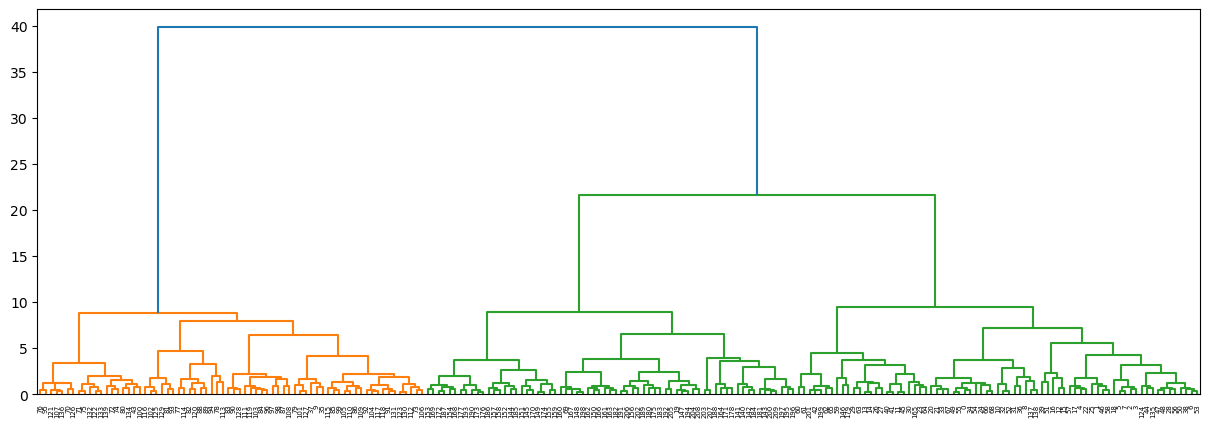

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
plt.figure(figsize=(15,5))
mergings = linkage(cls, metric='euclidean', method='ward')
dendrogram(mergings)
plt.show()

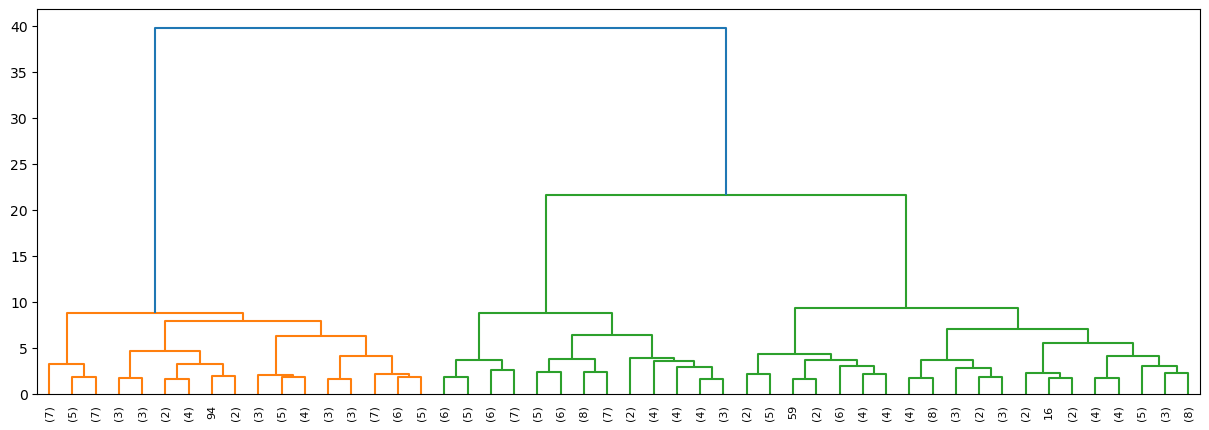

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
plt.figure(figsize=(15,5))
mergings = linkage(cls, metric='euclidean', method='ward')
dendrogram(mergings, truncate_mode='lastp', p=50)
plt.show()

In [8]:
clustercut = pd.Series(cut_tree(mergings, n_clusters=3).reshape(-1,))
clustercut

0      0
1      0
2      0
3      0
4      0
      ..
205    2
206    2
207    2
208    2
209    2
Length: 210, dtype: int32

In [9]:
df['cluster'] = clustercut
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target,cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,0


### Cluster Profiling

In [10]:
df.groupby('cluster').agg('mean')

,A,P,C,LK,WK,A_Coef,LKG,target
cluster,,,,,,,,
0,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,0.191781
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,0.942857
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,1.940299


In [11]:
pd.crosstab(df['target'], df['cluster'])

cluster,0,1,2
target,,,
0,64,4,2
1,4,66,0
2,5,0,65


### k-Means Cluster Analysis

In [4]:
from sklearn.cluster import KMeans

In [13]:
wcss = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cls)
    wcss.append(kmeans.inertia_)

C:\Users\praka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\praka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\praka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\praka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

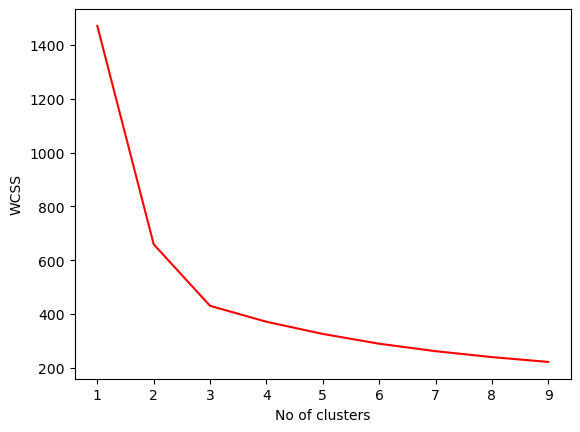

In [14]:
plt.plot(range(1, 10), wcss, 'r')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
from sklearn.metrics import silhouette_score

In [16]:
wcss = []
sscore = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cls)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    score = silhouette_score(cls, labels)
    sscore.append(score)

C:\Users\praka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\praka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\praka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\praka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

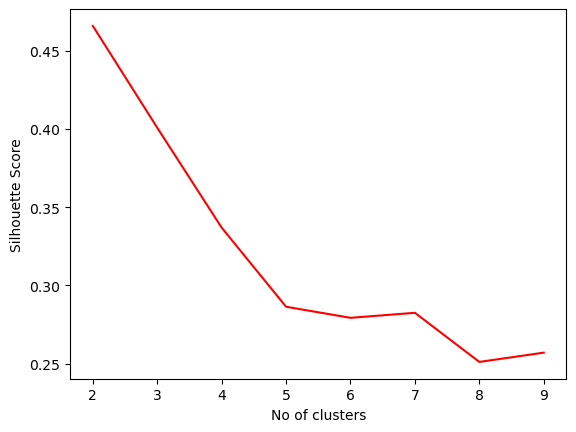

In [17]:
plt.plot(range(2, 10), sscore, 'r')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [6]:
import sys

In [23]:
#import plusmodules as pm
sys.svisualizer(cls, 3)

AttributeError: module 'sys' has no attribute 'svisualizer'

In [19]:
!pip install plusmodules

ERROR: Could not find a version that satisfies the requirement plusmodules (from versions: none)
ERROR: No matching distribution found for plusmodules


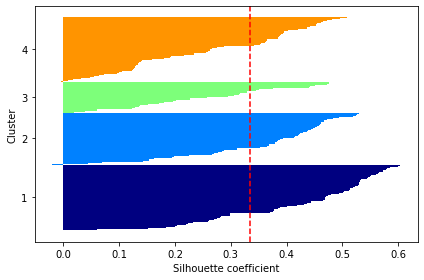

In [58]:
pm.svisualizer(cls, 4)

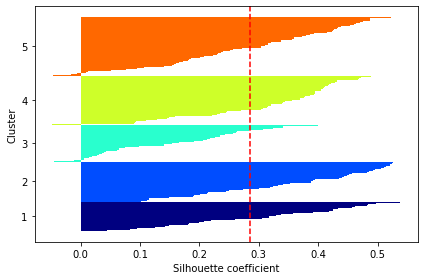

In [61]:
pm.svisualizer(cls, 5)

# drop after scaledand didrogram

In [ ]:
# Drop non-numerical columns      # take home day 2
df = df.drop(columns=['Food'])

In [27]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# The scaled data is now a NumPy array
print(df_scaled)

[[0.44098206 0.50206612 0.5707804  ... 0.34515017 0.         0.        ]
 [0.40509915 0.44628099 0.66243194 ... 0.21516494 0.         0.        ]
 [0.34938621 0.34710744 0.87931034 ... 0.1506647  0.         0.        ]
 ...
 [0.24645892 0.25826446 0.7277677  ... 0.26440177 1.         1.        ]
 [0.11803588 0.16528926 0.39927405 ... 0.25849335 1.         1.        ]
 [0.16147309 0.19214876 0.54718693 ... 0.26784835 1.         1.        ]]


In [30]:
dist_mat = pairwise_distances(df, metric='euclidean')

# The distance matrix is now a NumPy array
print(dist_mat)

[[0.         1.33357752 1.45343524 ... 7.1473184  4.98528657 5.57583678]
 [1.33357752 0.         1.86846948 ... 8.06337931 5.1133976  6.14342521]
 [1.45343524 1.86846948 0.         ... 6.4015737  3.98752021 4.62022733]
 ...
 [7.1473184  8.06337931 6.4015737  ... 0.         4.94612782 2.85502049]
 [4.98528657 5.1133976  3.98752021 ... 4.94612782 0.         2.10007516]
 [5.57583678 6.14342521 4.62022733 ... 2.85502049 2.10007516 0.        ]]


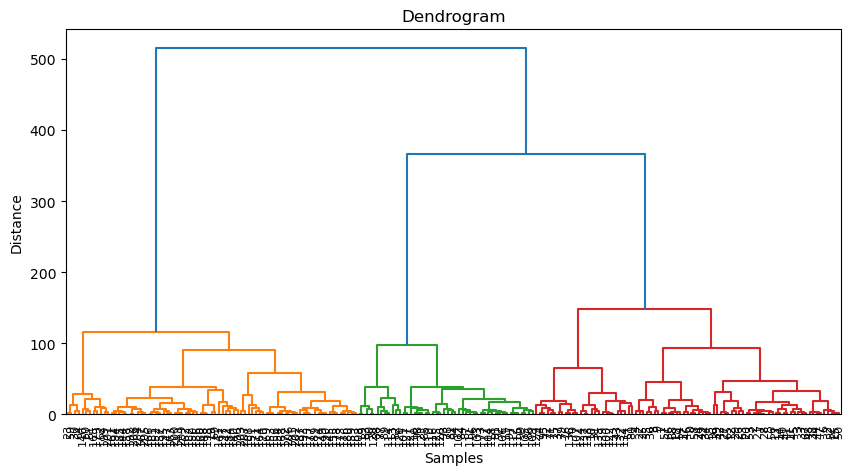

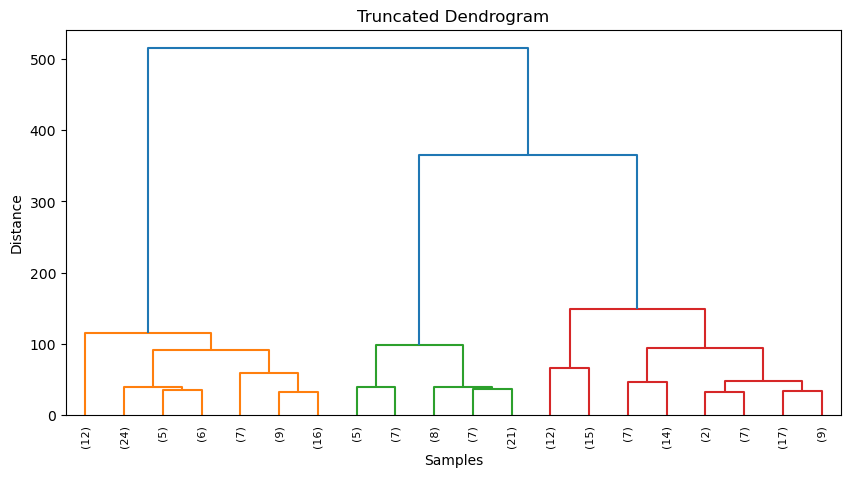

In [34]:
# Calculate the linkage matrix using the 'ward' method
linkage_matrix = sch.linkage(dist_mat, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

# Determine the optimal number of clusters using the dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90, leaf_font_size=8)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Truncated Dendrogram')
plt.show()

# Determine the optimal number of clusters
n_clusters = 4  # for example